In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygam
import warnings
import lec2_graphs as afx

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (14,8)
plt.style.use('seaborn')

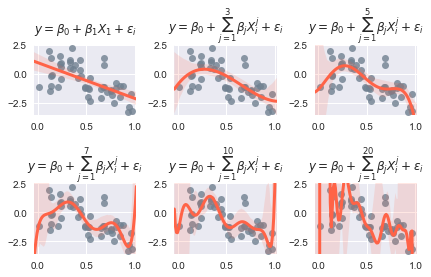

In [2]:
afx.polynomial_degrees()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('kc_house_data.csv')
df.drop(['zipcode','id','date'],axis=1, inplace=True)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

df_scaled['price'] = np.log(df['price'])
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1],'intercept', np.ones(N))
y = df_scaled['price']
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.30, random_state=63)

In [4]:
from pygam import LinearGAM

In [5]:
search_params = {'lam': np.logspace(-3,3,11)}

In [6]:
gam = LinearGAM().gridsearch(X_train,y_train, **search_params)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:02 ETA:   0:00:20/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 18% (2 of 11) |####                     | Elapsed Time: 0:00:03 ETA:   0:00:17/anaconda3/lib/python3.7/site-packa

In [7]:
gam.lam # solo tiene sentido si lo evaluas con los resultados generados

3.981071705534969

In [8]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    156.1823
Link Function:                     IdentityLink Log Likelihood:                               -162761.3469
Number of Samples:                        15129 AIC:                                           325837.0584
                                                AICc:                                            325840.38
                                                GCV:                                                0.0384
                                                Scale:                                              0.0377
                                                Pseudo R-Squared:                                   0.8671
Feature Function   Data Type      Num

In [9]:
# te entrega feature - typo dato, numero de splines ,hasta que orden llega, si logra un fit, un param de regularizacion y su significancia

In [10]:
from pygam.utils import generate_X_grid

In [11]:
x_grid = generate_X_grid(gam)
attribute = X_train.columns
cols = 6 ; rows = int(len(attribute) / cols)

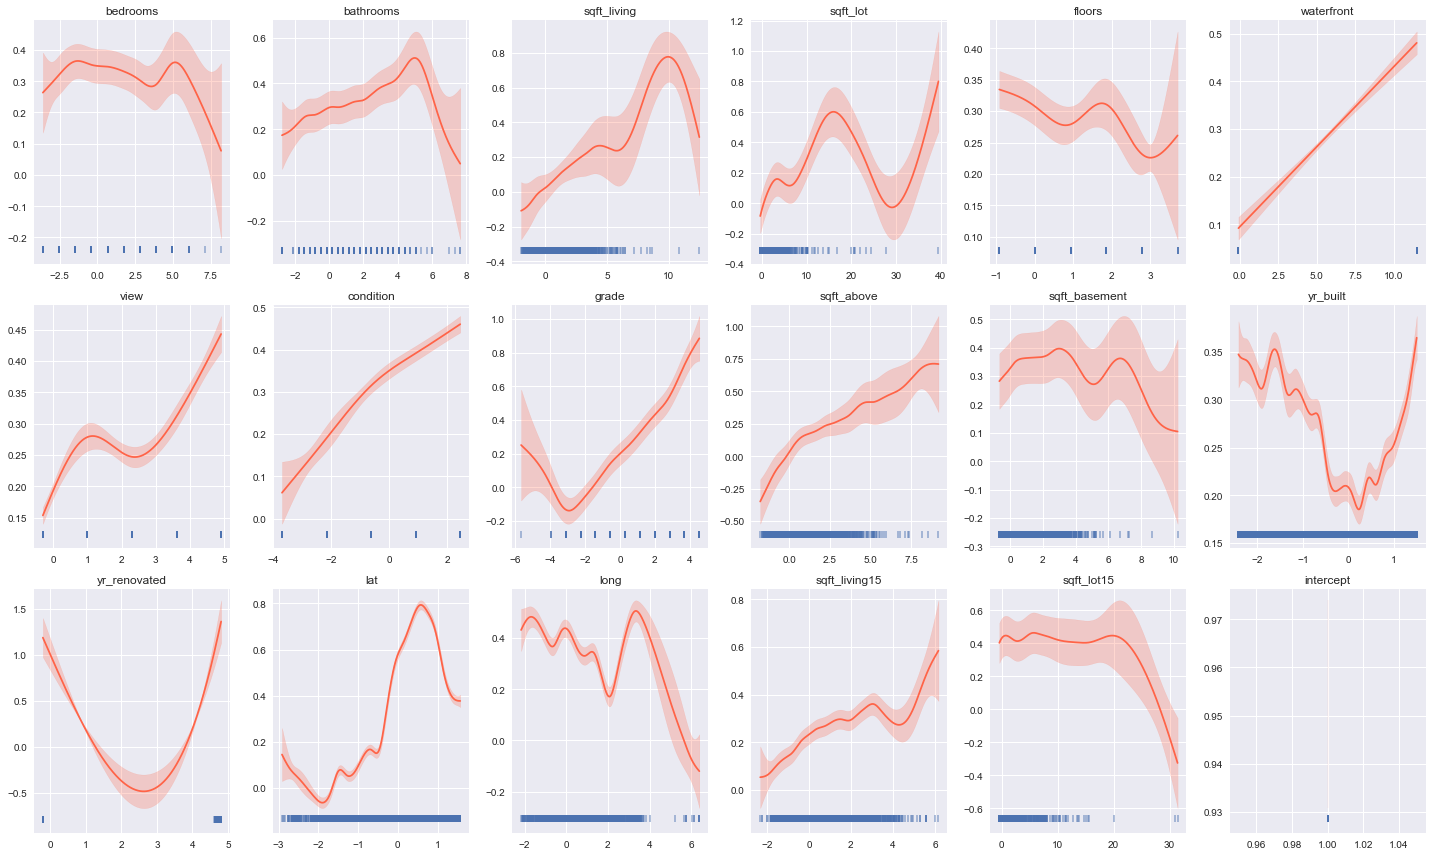

In [12]:
plt.rcParams['figure.figsize'] = (20,12)
for i,n in enumerate(range(len(attribute))):
    plt.subplot(rows,cols, i+1)
    partial_dep , confidence_intervals = gam.partial_dependence(x_grid, feature=i +1, width=.95)
    plt.plot(x_grid[:,n], partial_dep, color = 'tomato')
    plt.fill_between(x_grid[:,n], 
                    confidence_intervals[0][:,0],
                    confidence_intervals[0][:,1],
                    color='tomato', alpha=.25)
    plt.title(attribute[n])
    plt.scatter(X_train[attribute[n]],
               [plt.ylim()[0]] * len(X_train[attribute[n]]),
               marker='|', alpha = .5)
    plt.tight_layout()

In [13]:
new_gam = LinearGAM(lam = 1e3)
new_gam.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


LinearGAM(callbacks=[Deviance(), Diffs()], constraints=None, 
   dtype='auto', fit_intercept=True, fit_linear=False, 
   fit_splines=True, lam=1000.0, max_iter=100, n_splines=25, 
   penalties='auto', scale=None, spline_order=3, tol=0.0001, 
   verbose=False)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error,median_absolute_error
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2 accuracy: {0}'.format(r2_score(y_test,
    model.predict(X_test)).round(3)))
    print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test,
    model.predict(X_test))).round(3)))
    print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test,
    model.predict(X_test)).round(3)))

In [15]:
report_gam_metrics(gam, X_test, y_test)

Test R^2 accuracy: 0.854
Test RMSE accuracy: 0.198
Test MAE accuracy: 0.112


In [16]:
report_gam_metrics(new_gam, X_test, y_test)

Test R^2 accuracy: 0.851
Test RMSE accuracy: 0.2
Test MAE accuracy: 0.116


/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


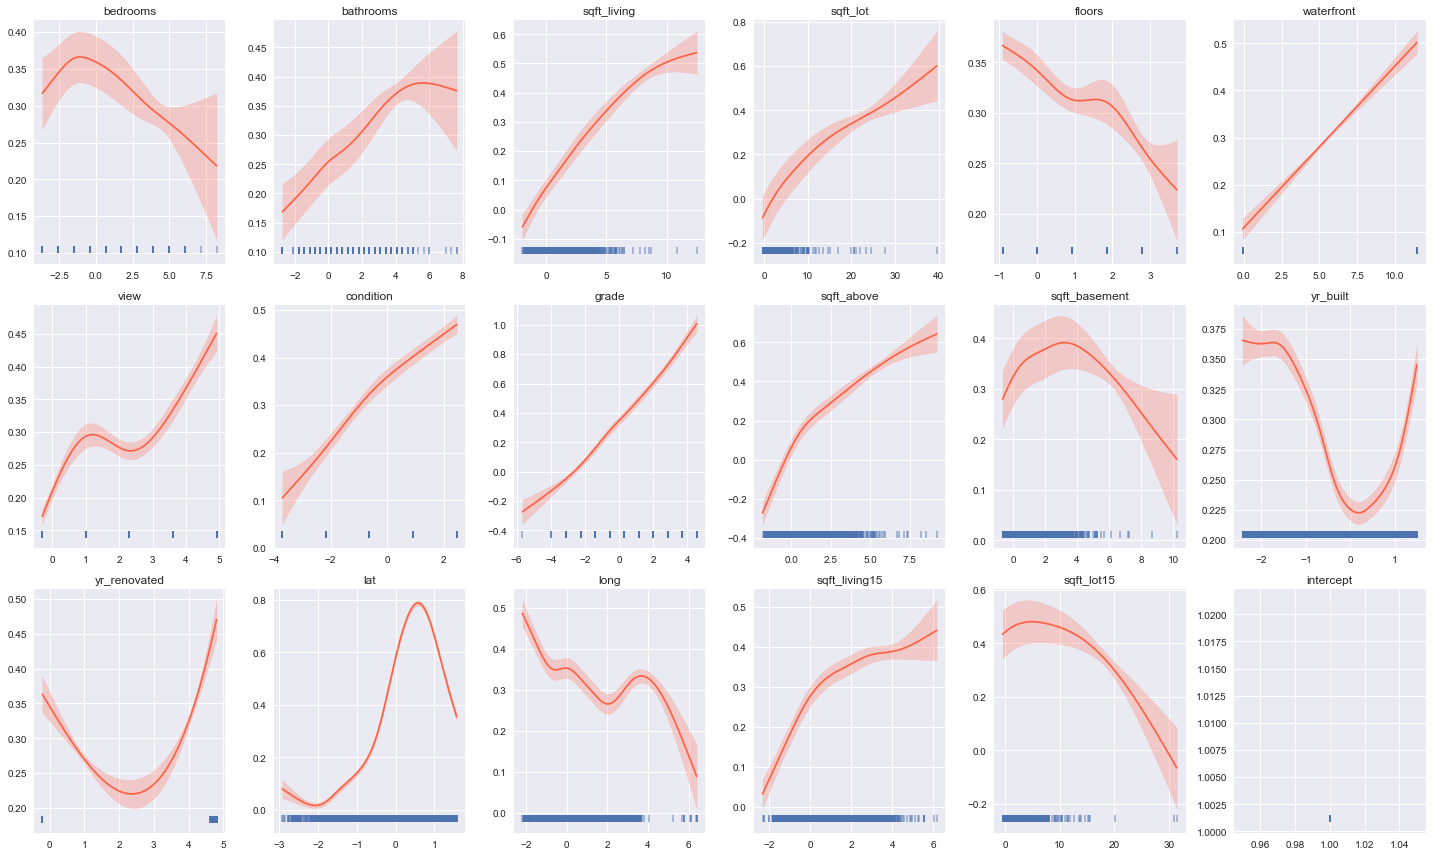

In [17]:
plt.rcParams['figure.figsize'] = (20,12)
x_grid = generate_X_grid(new_gam)
for i,n in enumerate(range(len(attribute))):
    plt.subplot(rows,cols, i+1)
    partial_dep , confidence_intervals = new_gam.partial_dependence(x_grid, feature=i +1, width=.95)
    plt.plot(x_grid[:,n], partial_dep, color = 'tomato')
    plt.fill_between(x_grid[:,n], 
                    confidence_intervals[0][:,0],
                    confidence_intervals[0][:,1],
                    color='tomato', alpha=.25)
    plt.title(attribute[n])
    plt.scatter(X_train[attribute[n]],
               [plt.ylim()[0]] * len(X_train[attribute[n]]),
               marker='|', alpha = .5)
    plt.tight_layout()